In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [5]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# As we can see we have 'Label' where we littery store the number so we will one_hot it!
Then we have the rest of the pixels image in its column from 0 to 783 so 784 pixels

In [6]:
y_train = data['label']

In [7]:
y_train.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [8]:
y_train.shape

(42000,)

In [9]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [10]:
y_train.describe()

count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [11]:
x_train = data.drop('label',axis=1)

We have 0 min and 9 max so 10 numbers!

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size=0.1)

In [13]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [14]:
y_cat_train[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [15]:
y_cat_train.shape

(37800, 10)

In [16]:
x_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
12332,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25347,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15922,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
x_train.shape

(37800, 784)

In [18]:
x_train.loc[[1]]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
x_train.loc[[1][0]].shape

(784,)

In [20]:
test_image = np.asarray(x_train.loc[[1][0]])

In [21]:
test_image.shape

(784,)

In [22]:
test_image = test_image.reshape(28,28)

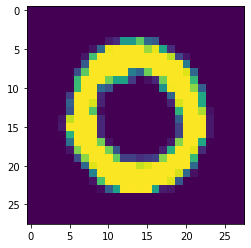

In [23]:
plt.imshow(test_image)

# Ok now we will have to turn pixels on each row to a image and store it to an array

In [24]:
data_images_train = []
data_images_test = []

In [25]:
x_train.shape[0]

37800

In [26]:
x_test.shape[0]

4200

for ids,row in x_test.iterrows():
    print(ids)

In [27]:
for id, row in x_train.iterrows():
    store = np.asarray(x_train.loc[[id][0]])
    store = store.reshape(28,28)
    data_images_train.append(store)
    
for id, row in x_test.iterrows():
    store = np.asarray(x_test.loc[[id][0]])
    store = store.reshape(28,28)
    data_images_test.append(store)

In [28]:
data_images_train = np.asarray(data_images_train)
data_images_test = np.asarray(data_images_test)

In [29]:
data_images_train.shape

(37800, 28, 28)

In [30]:
data_images_test.shape

(4200, 28, 28)

In [31]:
data_images_train.max()

255

In [32]:
data_images_train.min()

0

In [33]:
data_images_test.max()

255

In [34]:
data_images_test.min()

0

In [35]:
data_images_train = data_images_train/255
data_images_test = data_images_test/255

In [36]:
data_images_test.max()

1.0

In [37]:
data_images_test.max()

1.0

# Ok now we haev the data in numpy

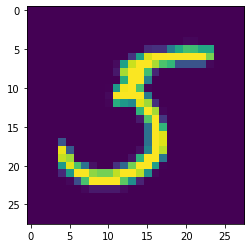

In [38]:
plt.imshow(data_images_train[20])

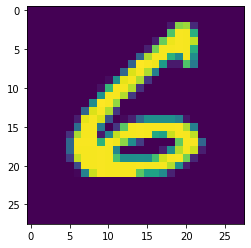

In [39]:
plt.imshow(data_images_test[435])

We have altough to reshape to have channel dimensions!

In [40]:
x_train = data_images_train.reshape(37800,28,28,1)
x_test = data_images_test.reshape(4200,28,28,1)

In [41]:
x_train.shape

(37800, 28, 28, 1)

In [42]:
x_test.shape

(4200, 28, 28, 1)

In [43]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [44]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


Ok good but now we don't have dataset to do evaluation so lets first brake the dataset in train and test and then fit!

In [46]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1182/1182 [==============================] - 17s 15ms/step - loss: 0.1681 - accuracy: 0.9485
Epoch 2/10
1182/1182 [==============================] - 16s 14ms/step - loss: 0.0573 - accuracy: 0.9830
Epoch 3/10
1182/1182 [==============================] - 16s 13ms/step - loss: 0.0401 - accuracy: 0.9883
Epoch 4/10
1182/1182 [==============================] - 16s 14ms/step - loss: 0.0292 - accuracy: 0.9915
Epoch 5/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0225 - accuracy: 0.9937
Epoch 6/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0175 - accuracy: 0.9952
Epoch 7/10
1182/1182 [==============================] - 16s 14ms/step - loss: 0.0128 - accuracy: 0.9966
Epoch 8/10
1182/1182 [==============================] - 17s 14ms/step - loss: 0.0101 - accuracy: 0.9971
Epoch 9/10
1182/1182 [==============================] - 18s 15ms/step - loss: 0.0075 - accuracy: 0.9980
Epoch 10/10
1182/1182 [==============================] - 18s 15m

In [47]:
model.metrics_names

['loss', 'accuracy']

In [48]:
model.evaluate(x_test,y_cat_test)

132/132 [==============================] - 1s 4ms/step - loss: 0.0684 - accuracy: 0.9869


[0.06838452070951462, 0.9869047403335571]

In [49]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
predictions[1]

2

In [51]:
y_test

36527    2
11875    2
39168    0
10977    1
9326     7
        ..
29287    1
41300    2
6464     0
31565    1
34689    2
Name: label, Length: 4200, dtype: int64

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       390
           1       1.00      0.99      1.00       478
           2       0.98      0.99      0.99       434
           3       0.99      0.98      0.99       440
           4       0.98      0.99      0.98       385
           5       0.99      0.98      0.99       410
           6       1.00      0.99      0.99       411
           7       0.99      0.99      0.99       445
           8       0.99      0.98      0.98       403
           9       0.96      0.98      0.97       404

    accuracy                           0.99      4200
   macro avg       0.99      0.99      0.99      4200
weighted avg       0.99      0.99      0.99      4200



## As we can se we have great scores, now lets train on the entire dataset so we will have better chances at thetest_csv 

In [53]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [54]:
y_train = data['label']
x_train = data.drop('label',axis=1)
y_cat_train = to_categorical(y_train,10)

In [55]:
data_images = []
for i in range(x_train.shape[0]):
    store = np.asarray(x_train.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [56]:
data_images = np.asarray(data_images)

In [57]:
data_images = data_images/255

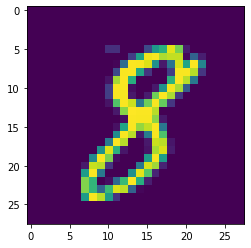

In [58]:
plt.imshow(data_images[20])

In [59]:
x_train = data_images.reshape(42000,28,28,1)

In [60]:
model2 = Sequential()

# CONVOLUTIONAL LAYER
model2.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model2.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
model2.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model2.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model2.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model2.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model2.add(Dense(10, activation='softmax'))


model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [61]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [62]:
model2.fit(x_train,y_cat_train,epochs=20)

Epoch 1/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.1388 - accuracy: 0.9568
Epoch 2/20
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0458 - accuracy: 0.9861
Epoch 3/20
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0323 - accuracy: 0.9902
Epoch 4/20
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0254 - accuracy: 0.9922
Epoch 5/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0205 - accuracy: 0.9938
Epoch 6/20
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0169 - accuracy: 0.9952
Epoch 7/20
1313/1313 [==============================] - 26s 19ms/step - loss: 0.0141 - accuracy: 0.99610s - loss: 0.0143 - ac
Epoch 8/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0128 - accuracy: 0.9967
Epoch 9/20
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0096 - accuracy: 0.9974
Epoch 10/20
1313/1313 [===================

## Ok now we should import test csv

In [63]:
test_data = pd.read_csv('./digit-recognizer/test.csv')

In [64]:
test_data.shape[0]

28000

In [65]:
data_images = []
for i in range(test_data.shape[0]):
    store = np.asarray(test_data.loc[[i][0]])
    store = store.reshape(28,28)
    data_images.append(store)

In [66]:
data_images = np.asarray(data_images)
data_images = np.asarray(data_images)/255
test_images = data_images.reshape(28000,28,28,1)

In [67]:
test_predictions = model2.predict_classes(test_images)

In [68]:
test_predictions[1]

0

In [69]:
test_predictions[5]

7

In [70]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
export = []
for i in range(test_data.shape[0]):
    export.append([i+1,test_predictions[i]])

In [72]:
df = pd.DataFrame(export, columns=['ImageId', 'Label'])

In [73]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


## Successfully created dataframe for submission

In [74]:
df.to_csv(r'./Submission.csv')

In [75]:
df.shape

(28000, 2)

## What a time to be alive!